# Part I - (Loan Data from Prosper Analysis)
## by (EMMANUEL ESHUN)

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [137]:
# import all packages and set plots to be embedded inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

warnings.filterwarnings('ignore')
%matplotlib inline

In [138]:
df = pd.read_csv('prosperLoanData.csv')

In [139]:
df.shape

(113937, 81)

In [140]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,8/26/2007,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2/27/2014,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,1/5/2007,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,10/22/2012,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,9/14/2013,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [141]:
# extracting variable of interests from the df
df_main = df[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedReturn' , 'EstimatedLoss', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'EmploymentStatusDuration', 'Investors'
]]

In [142]:
df_main.head(5)

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedReturn,EstimatedLoss,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,MonthlyLoanPayment,EmploymentStatusDuration,Investors
0,1021339766868145413AB3B,8/26/2007,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,CO,Other,Self-employed,2.0,True,3083.333333,330.43,2.0,258
1,10273602499503308B223C1,2/27/2014,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.05470,0.0249,CO,Professional,Employed,44.0,False,6125.000000,318.93,44.0,1
2,0EE9337825851032864889A,1/5/2007,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,GA,Other,Not available,NaN,False,2083.333333,123.32,NaN,41
3,0EF5356002482715299901A,10/22/2012,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.06000,0.0249,GA,Skilled Labor,Employed,113.0,True,2875.000000,321.45,113.0,158
4,0F023589499656230C5E3E2,9/14/2013,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.09066,0.0925,MN,Executive,Employed,44.0,True,9583.333333,563.97,44.0,20


In [143]:
# checking data types of vatiables
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   ListingCreationDate       113937 non-null  object 
 2   Term                      113937 non-null  int64  
 3   LoanStatus                113937 non-null  object 
 4   ClosedDate                55089 non-null   object 
 5   BorrowerAPR               113912 non-null  float64
 6   BorrowerRate              113937 non-null  float64
 7   LenderYield               113937 non-null  float64
 8   EstimatedEffectiveYield   84853 non-null   float64
 9   EstimatedReturn           84853 non-null   float64
 10  EstimatedLoss             84853 non-null   float64
 11  BorrowerState             108422 non-null  object 
 12  Occupation                110349 non-null  object 
 13  EmploymentStatus          111682 non-null  o

In [144]:
# Change ListingCreationDate datatype to datetime
df_main["ListingCreationDate"] = pd.to_datetime(df["ListingCreationDate"])

In [145]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   ListingCreationDate       113937 non-null  datetime64[ns]
 2   Term                      113937 non-null  int64         
 3   LoanStatus                113937 non-null  object        
 4   ClosedDate                55089 non-null   object        
 5   BorrowerAPR               113912 non-null  float64       
 6   BorrowerRate              113937 non-null  float64       
 7   LenderYield               113937 non-null  float64       
 8   EstimatedEffectiveYield   84853 non-null   float64       
 9   EstimatedReturn           84853 non-null   float64       
 10  EstimatedLoss             84853 non-null   float64       
 11  BorrowerState             108422 non-null  object        
 12  Oc

In [191]:
df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0 '], dtype=object)

### What is the structure of your dataset?

> This dataset contains 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> BorrowAPR is the main feature we will be estimating in this project.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> BorrowerRate, EstimatedReturn, MonthlyLoanPayment, StatedMonthlyIncome is going to be the other features I think will help me achieve the set objective of the project.

## Univariate Exploration

### Question

### Which year has the most loan activity?

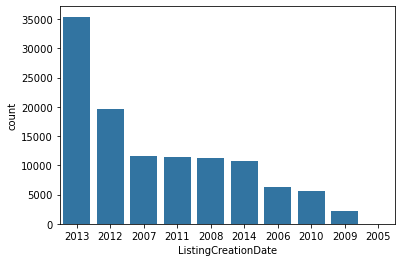

In [146]:
# Bar plot of years
xBar = df_main['ListingCreationDate'].dt.year
base_color = sb.color_palette()[0]
freq = xBar.value_counts(sort=True)
gen_order = freq.index
sb.countplot(data=df_main, x=xBar, color=base_color, order=gen_order);

#### Obeservation

we can observe that in the year 2013 we had the most loan activities in the Data.

### Question

### What is the distribution of  borrower's rate?

In [147]:
df_main['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

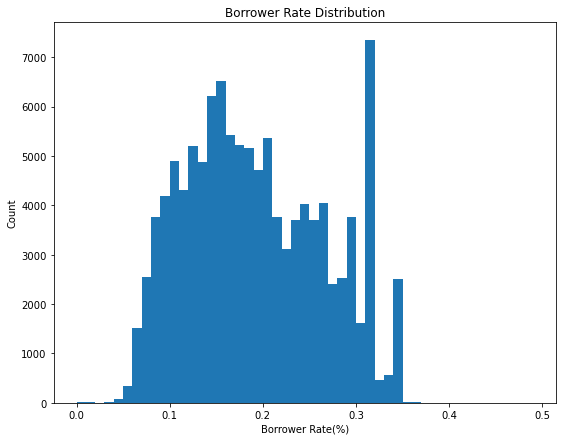

In [148]:
# Histogram of BorrowerRate
bins = np.arange(df_main.BorrowerRate.min(), df_main.BorrowerRate.max(), 0.01)
plt.figure(figsize = [9, 7])
plt.hist(data=df_main, x='BorrowerRate', bins=bins)
def xyt_lables(xL, yL, title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)
# function for titles
xyt_lables('Borrower Rate(%)', 'Count', 'Borrower Rate Distribution')

#### Obsevation

From the distribution above, it can be seen that
> There's some spikes in the graph and also the distribution is normal.

### Question

### How's BorrorwerAPR distributed?

In [149]:
df_main['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

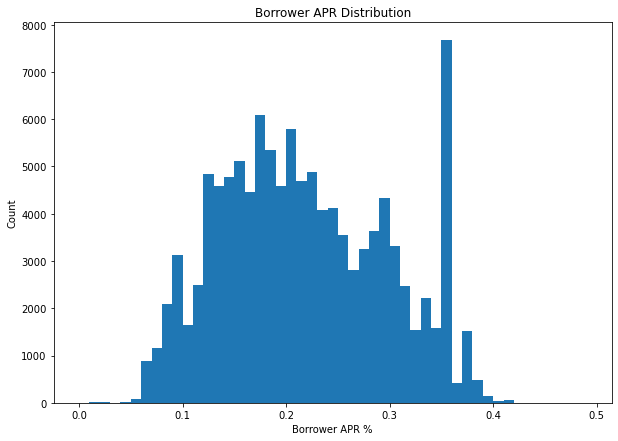

In [150]:
# Histogram of BorrowerAPR
bins = np.arange(df_main.BorrowerRate.min(), df_main.BorrowerRate.max(), 0.01)
plt.figure(figsize = [10, 7])
plt.hist(data=df_main, x='BorrowerAPR', bins=bins)
xyt_lables('Borrower APR %', 'Count', 'Borrower APR Distribution')

#### Observaion

The distribution looks multimodal. A peak centered around 0.1 and around 0.2, with high counts around 0.35 about. 

### Question

### What is the distribution of Stated Monthly Income?

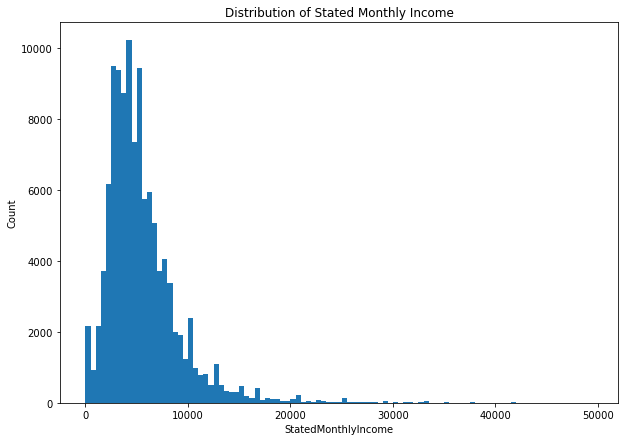

In [220]:
bins = np.arange(0, 50000, 500)
plt.figure(figsize = [10, 7])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins);
xyt_lables('StatedMonthlyIncome', 'Count', 'Distribution of Stated Monthly Income')

#### Observation

It can be seen that the distribution is skweed to the right, meaning most of the stated monthly income is less than 30,000.

### Question


### What is the frequency of the loan status?

In [151]:
# Analysing loan status
status = df_main['LoanStatus'].value_counts()
status

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

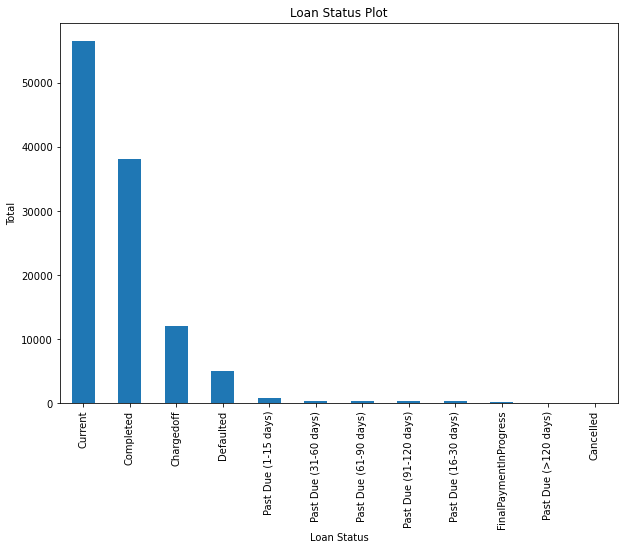

In [152]:
plt.figure(figsize = [10, 7])
status.plot(xlabel="Loan Status", ylabel="Total",kind="bar");
plt.title('Loan Status Plot');

#### Observation

Visually it can be estimated as the number of people in the scheme are still on going compared to cancelled which turned out to be the lowest.

### Question

### What is the frequency of the listing in States?

In [153]:
states = df_main.BorrowerState.value_counts()
# Top 20 states
states_20 = states[:20]
states_20

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
Name: BorrowerState, dtype: int64

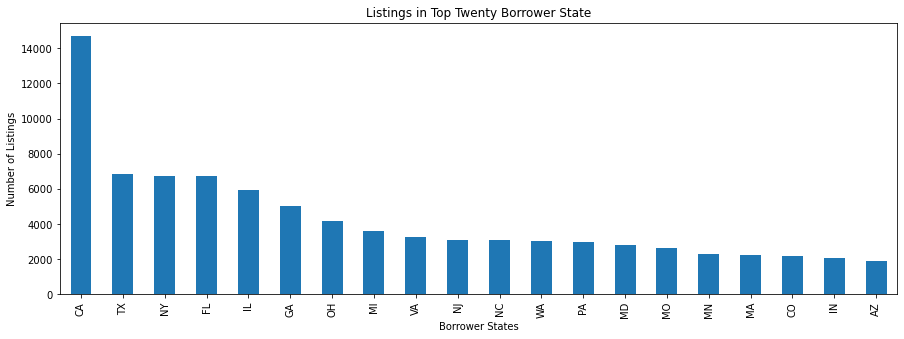

In [154]:
# color = sb.color_palette()[0]

plt.figure(figsize=(15, 5))
states_20.plot(kind='bar', color=base_color);
# labels function
xyt_lables('Borrower States', 'Number of Listings', 'Listings in Top Twenty Borrower State');
plt.xticks(rotation=90);

#### Observation

Most of these listings was from the CA, TX, NY, FL and IL, we had the least from IA, WY, ME, ND.

### Questions

### What is the frequency of various Occupations?

In [155]:
jobs = df_main.Occupation.value_counts()
# Top 20 states
jobs_20 = jobs[:20]
jobs_20

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

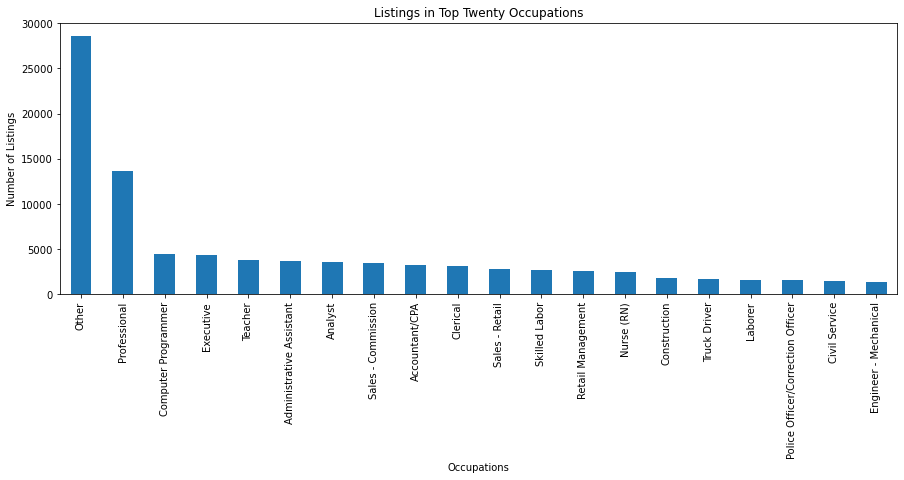

In [156]:
# color = sb.color_palette()[0]

plt.figure(figsize=(15, 5))
jobs_20.plot(kind='bar', color=base_color);


plt.title('Listings in Top Twenty Occupations');
plt.xlabel('Occupations');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

#### Observation

From our data marjority of the applicants selected other for Occupations which tend to lead in the dataset followed by Professional which is the second highest.

### Question

### What is the distribution of Borrower's Income

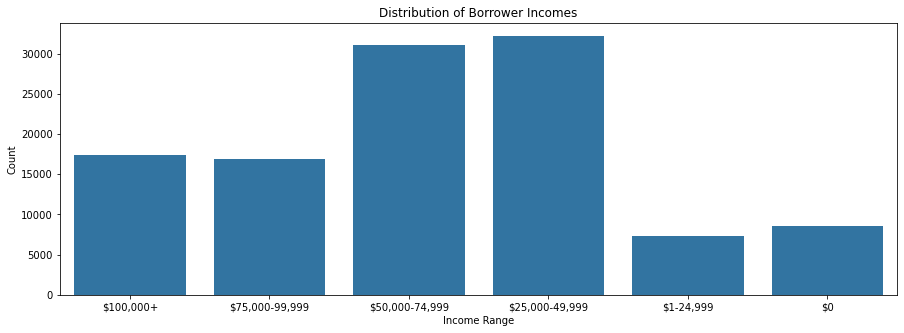

In [228]:
# bar chart
plt.figure(figsize = [15, 5])
sb.countplot(data = df, x = 'IncomeRange', color=base_color)
xyt_lables('Income Range', 'Count', 'Distribution of Borrower Incomes');


#### Observation

We can observe Visually that number of borrower's in the 50K-74K range are somwehat closer to the 25K-49K range, same applies to 100K-&5K and the 1-24K and 0.

## Bivariate Exploration

### Question

### What is the correlation between the variables of interest?

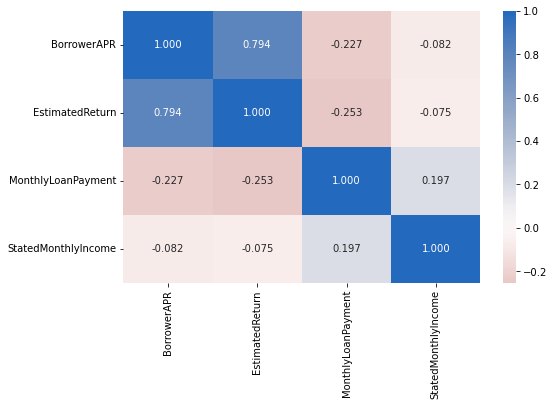

In [157]:
numeric_vars = ['BorrowerAPR', 'EstimatedReturn', 'MonthlyLoanPayment', 'StatedMonthlyIncome']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_main[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

#### Observation

There's a negative correlation between borrowerAPR and MonthlyLoanPayment, StatedMonthlyincome, whereas a positive one between the statedMonthlyincome and the monthly loan Payment

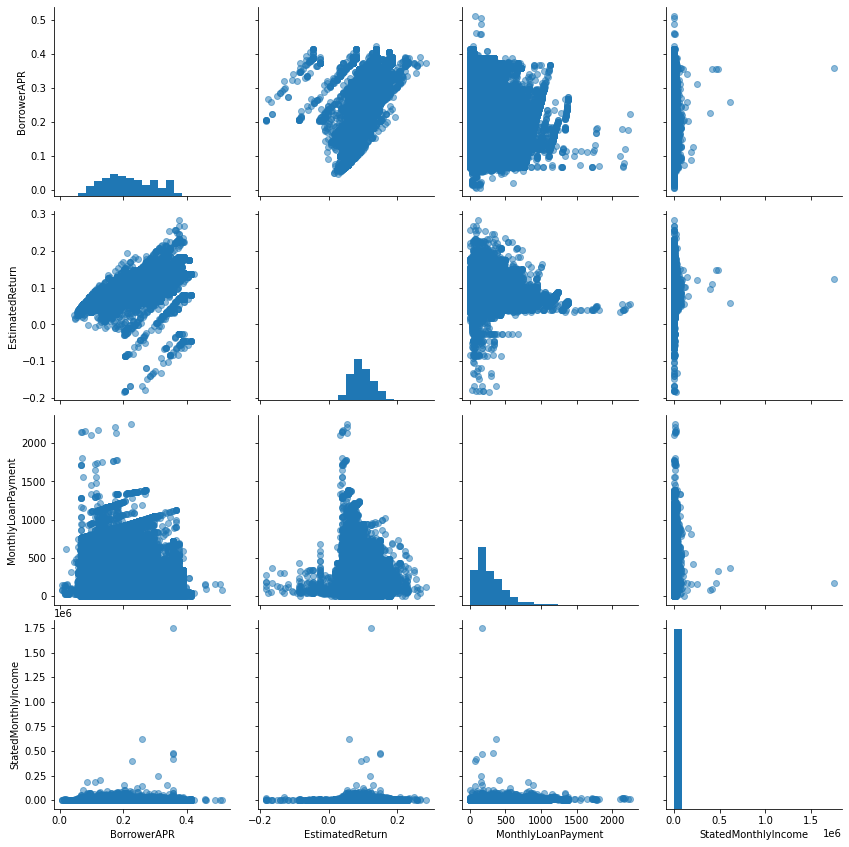

In [158]:
# plot matrix: sample 500 loans so that plots are clearer
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.reindex(samples)

# pair grid
g = sb.PairGrid(data = df, vars = numeric_vars, height = 3)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/2);




#### Observation

> As expected the BorrowerAPR and the EstimatedReturn shows a strong positive relationship where most of the other variables doesnt show a strong correlation.

### Question

### Is Borrorwer's APR determined by Employment status?

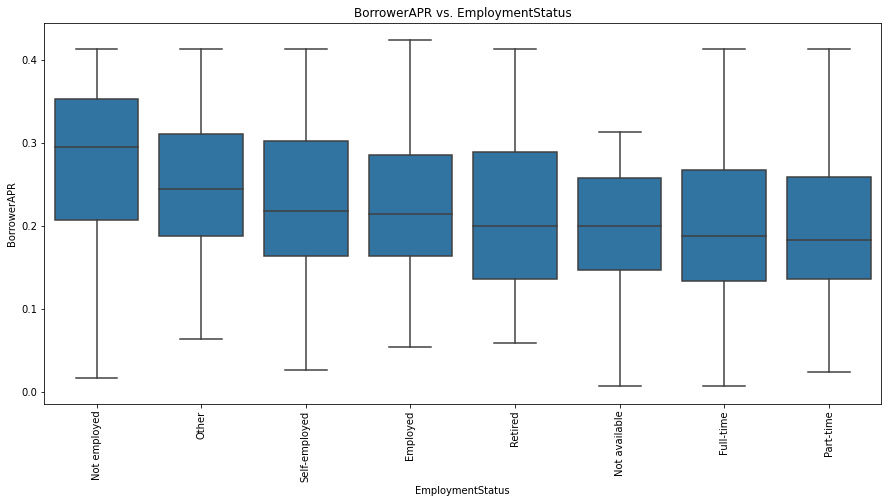

In [177]:
# Box Plots of variables
plt.figure(figsize = [15, 7]) 
base_color=sb.color_palette()[0]
group_median = df_main.groupby(["EmploymentStatus"])["BorrowerAPR"].median()
my_order= group_median.sort_values(ascending=False).index
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR',color=base_color, order=my_order)
plt.title('BorrowerAPR vs. EmploymentStatus')
plt.xlabel('EmploymentStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=90);

#### Obeservation

The plot shows an indication that the employment status is a good determining factor of borrower's APR. People without employment tend to have the highest APR as compared to Part-time employees.

### Question

### Is APR determined by IsBorrowerHomeowner?

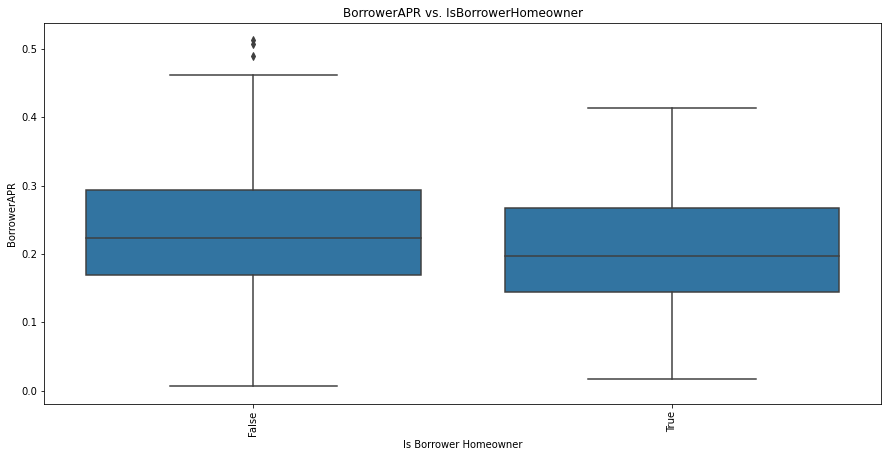

In [184]:
# Box Plots of variables
plt.figure(figsize = [15, 7]) 
base_color=sb.color_palette()[0]
sb.boxplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',color=base_color)
plt.title('BorrowerAPR vs. IsBorrowerHomeowner')
plt.xlabel('Is Borrower Homeowner')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=90);

#### Observation

It can also be observed that borrorwer's who are Home owners have lower APR compared those who are not.

### Question

###  Is APR determined by Income Range?

In [201]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

Let us combine the "Not employed", "Not displayed", and "$0" categories together for clearity sack.

In [206]:
df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [209]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ord_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['IncomeRange'] = df['IncomeRange'].astype(ord_var)

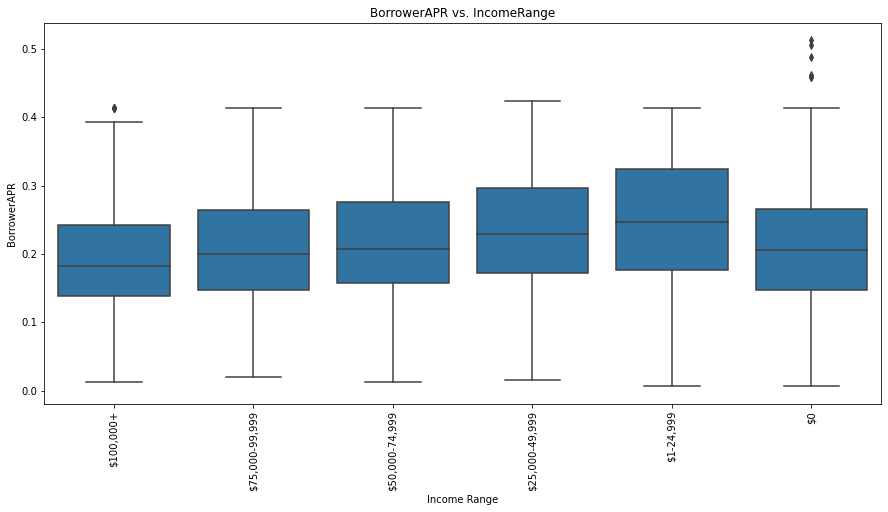

In [210]:
# Box Plots of variables
plt.figure(figsize = [15, 7]) 
base_color=sb.color_palette()[0]
sb.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR',color=base_color)
plt.title('BorrowerAPR vs. IncomeRange')
plt.xlabel('Income Range')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=90);

#### Observation

We can observe from these boxplots that the borrower's APR declines as the borrower's income rises.

## Multivariate Exploration

### What is the distribution of Effective Yield against Estimated loss and Estimated Return

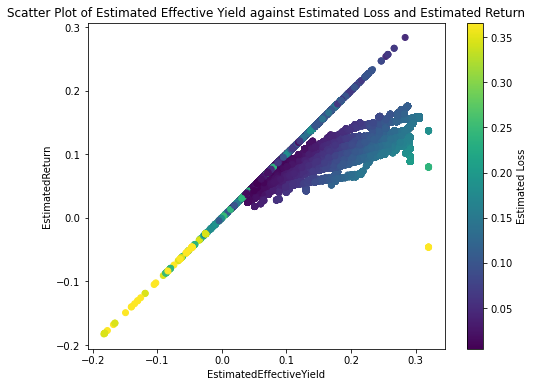

In [232]:
# plotting Estimated Effective Yield against Estimated Loss and Estimated Return
plt.figure(figsize = [8,6])
plt.scatter(data = df_main, x = 'EstimatedEffectiveYield', y = 'EstimatedReturn',
                c = 'EstimatedLoss')
plt.colorbar(label = 'Estimated Loss')
plt.xlim()
plt.ylim()
plt.xlabel('EstimatedEffectiveYield')
plt.ylabel('EstimatedReturn')
plt.title('Scatter Plot of Estimated Effective Yield against Estimated Loss and Estimated Return');

### Distribution of BorrowerAPR against BorrowerRate and LenderYield?

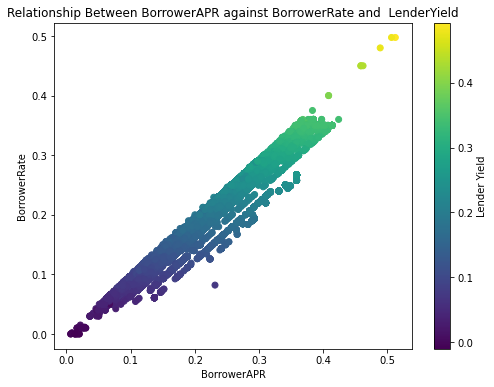

In [233]:
# plotting BorrowerAPR against BorrowerRate and  LenderYield

plt.figure(figsize = [8,6])
plt.scatter(data = df_main, x = 'BorrowerAPR', y = 'BorrowerRate',
                c = 'LenderYield')
plt.colorbar(label = 'Lender Yield')
plt.xlim()
plt.ylim()
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.title('Relationship Between BorrowerAPR against BorrowerRate and  LenderYield');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here I explored the replationship between Estimated EffectiveYield , Estimated Return and Estimated Loss
and to my surprise there's a strong positive  relationship between them in the first plot.

> Again, Exploration of the BorrorwerAPR, Borrower Rate and Lender Yield also showned a strong positive relationship too.